__SOLOMON-100 DATASET ANALYSIS__

Processing C1 from solomon-100/c108.txt...
Number of customers: 101
Total demand: 1810
Average demand: 17.92
Minimum demand: 0
Maximum demand: 50
Earliest ready time: 0
Latest due time: 1236
Total vehicle capacity: 5000
Demand-to-capacity ratio: 0.36


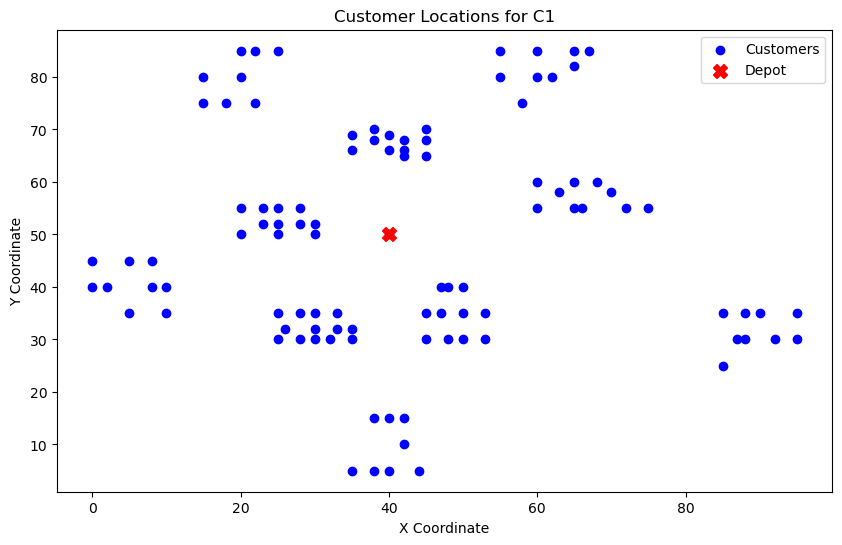

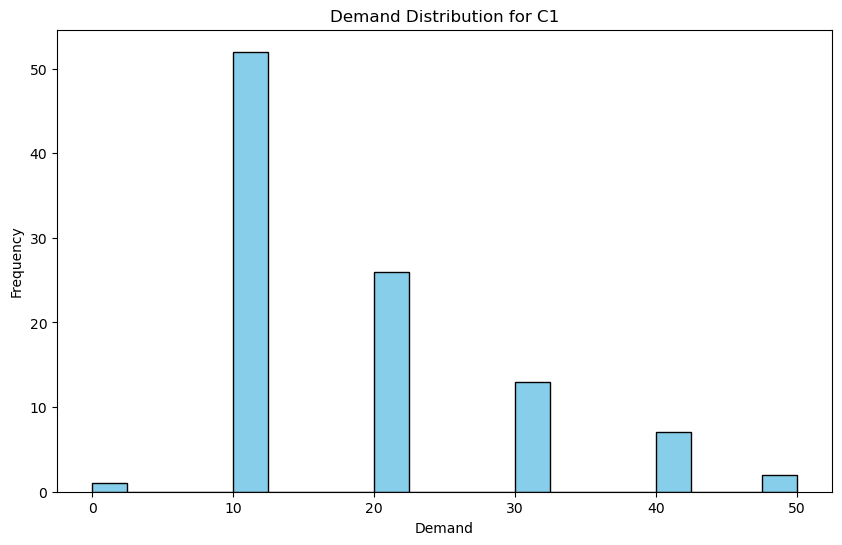

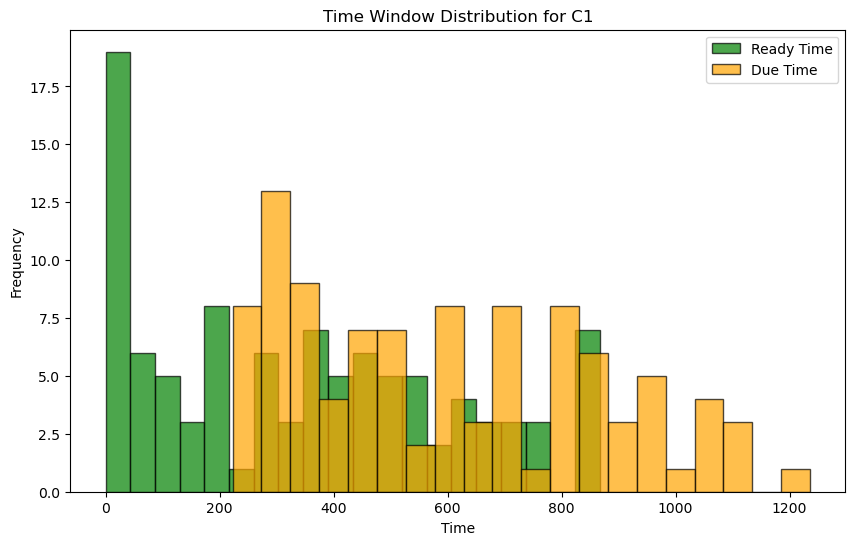

C:\Users\ruxan\AppData\Local\Temp\ipykernel_26800\3769574731.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['ready_time'], df['due_time']], labels=["Ready Time", "Due Time"], patch_artist=True,


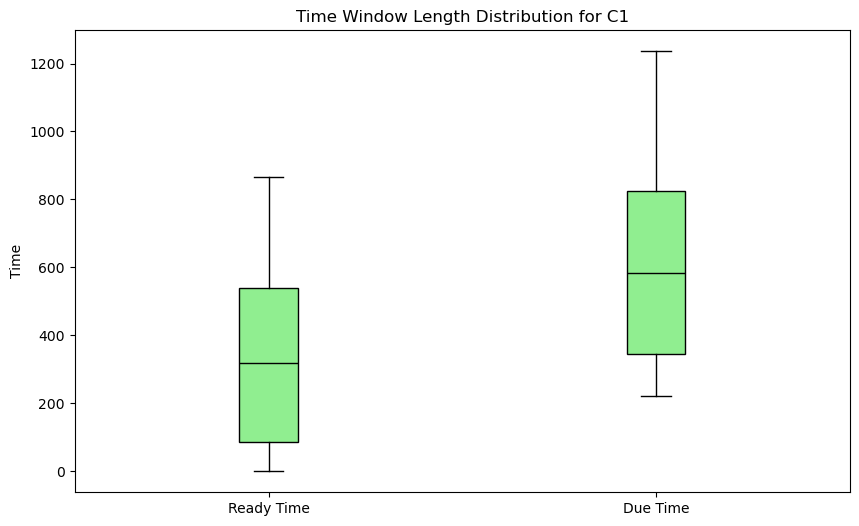

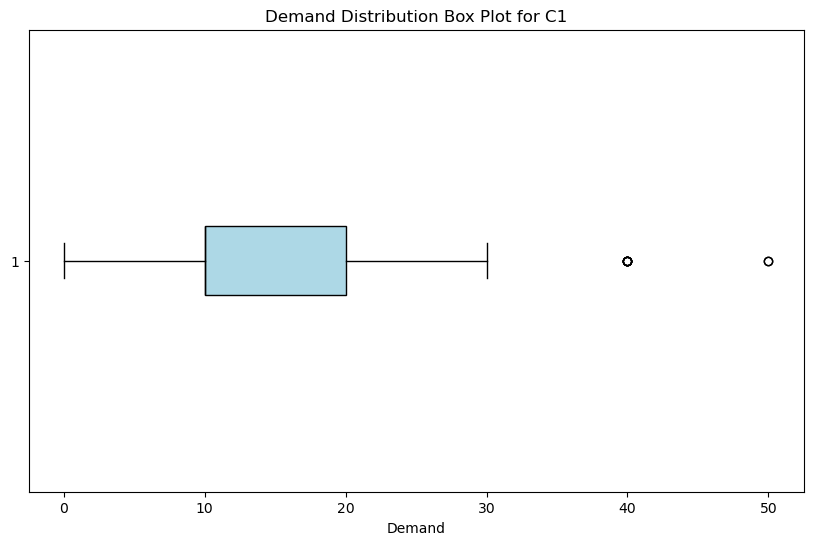

Processing C2 from solomon-100/c208.txt...
Number of customers: 101
Total demand: 1810
Average demand: 17.92
Minimum demand: 0
Maximum demand: 50
Earliest ready time: 0
Latest due time: 3390
Total vehicle capacity: 17500
Demand-to-capacity ratio: 0.10


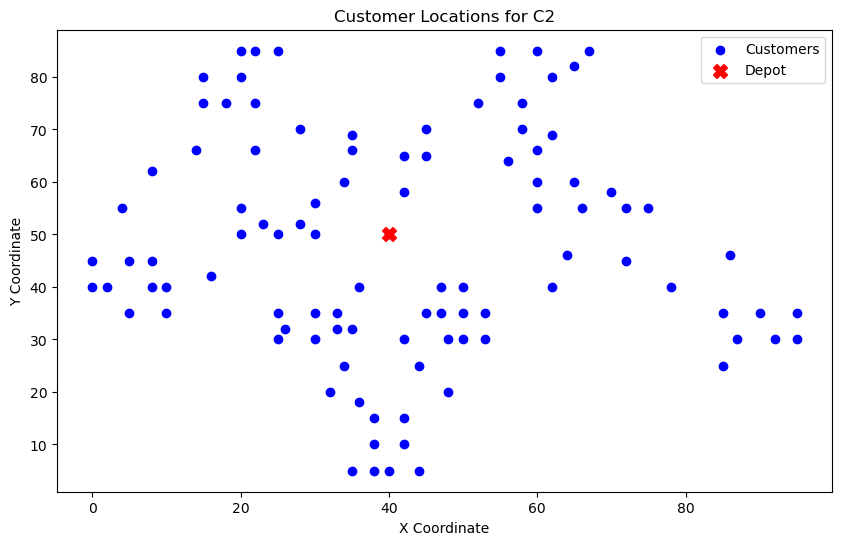

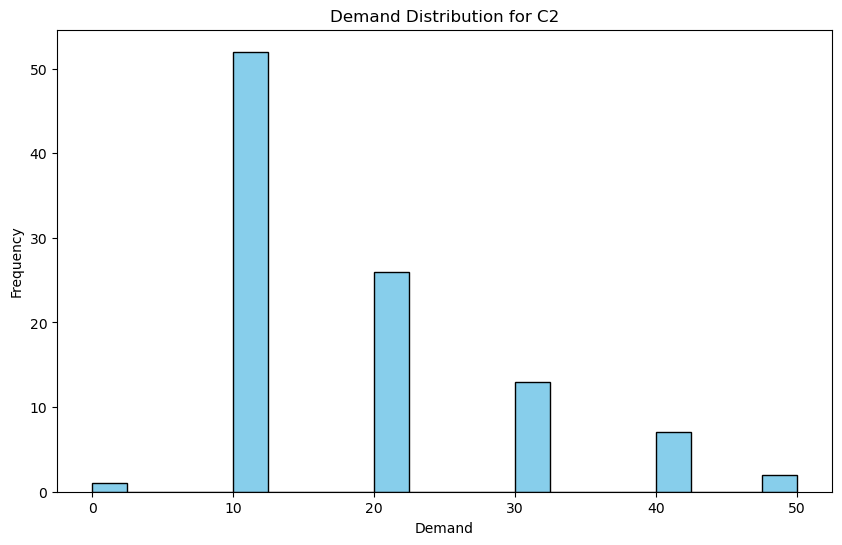

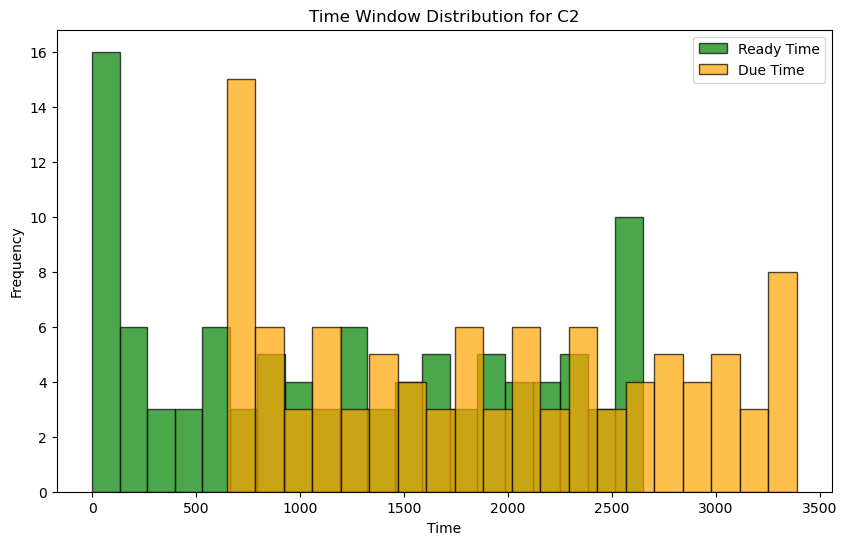

C:\Users\ruxan\AppData\Local\Temp\ipykernel_26800\3769574731.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['ready_time'], df['due_time']], labels=["Ready Time", "Due Time"], patch_artist=True,


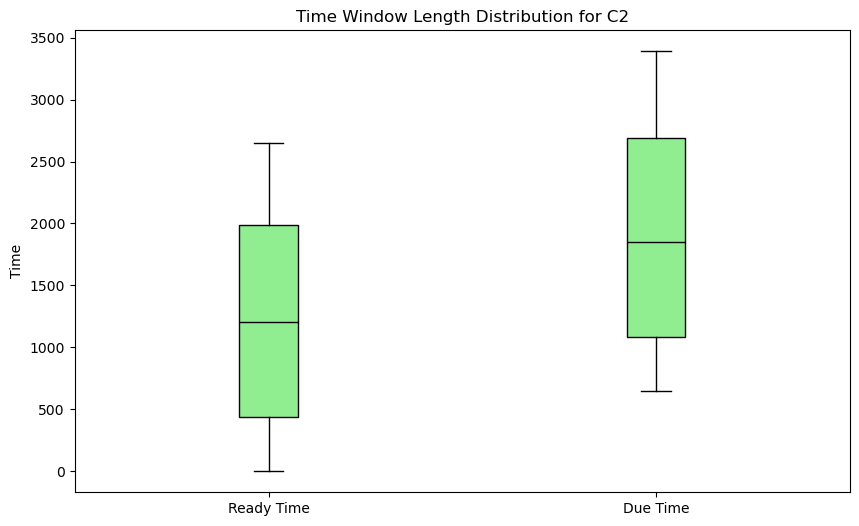

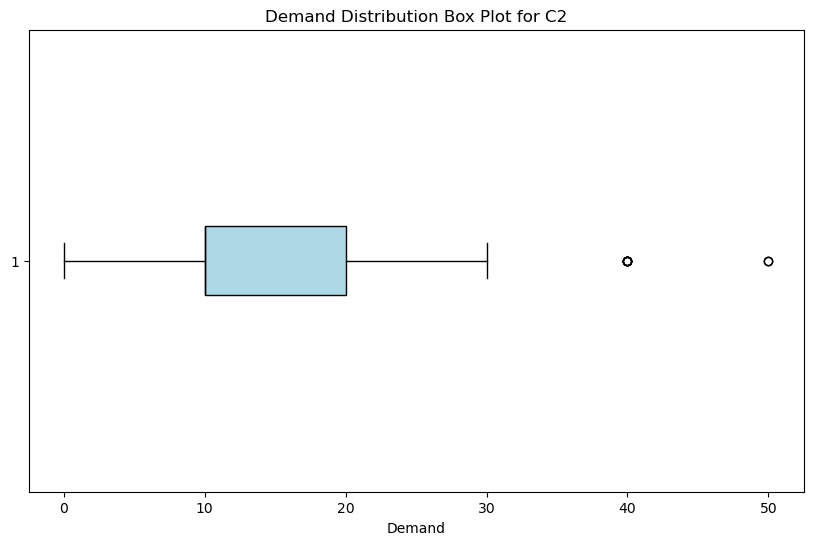

Processing R1 from solomon-100/r108.txt...
Number of customers: 101
Total demand: 1458
Average demand: 14.44
Minimum demand: 0
Maximum demand: 41
Earliest ready time: 0
Latest due time: 230
Total vehicle capacity: 5000
Demand-to-capacity ratio: 0.29


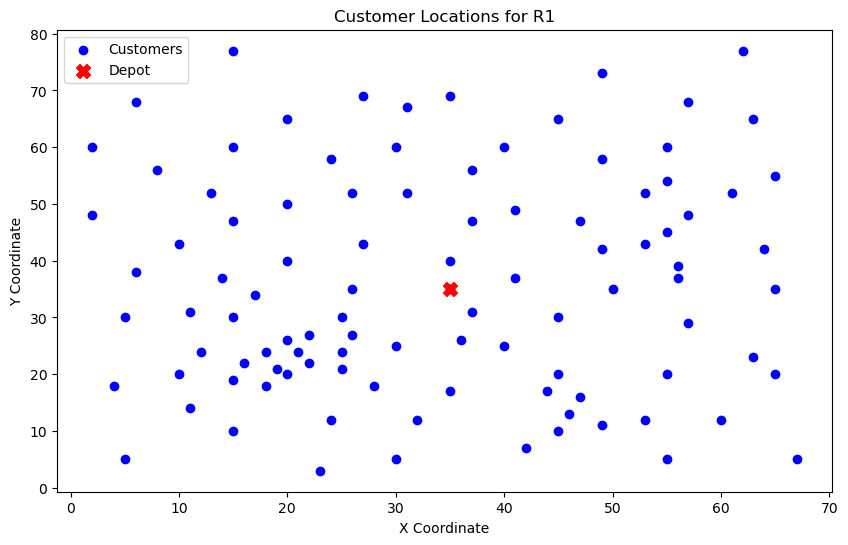

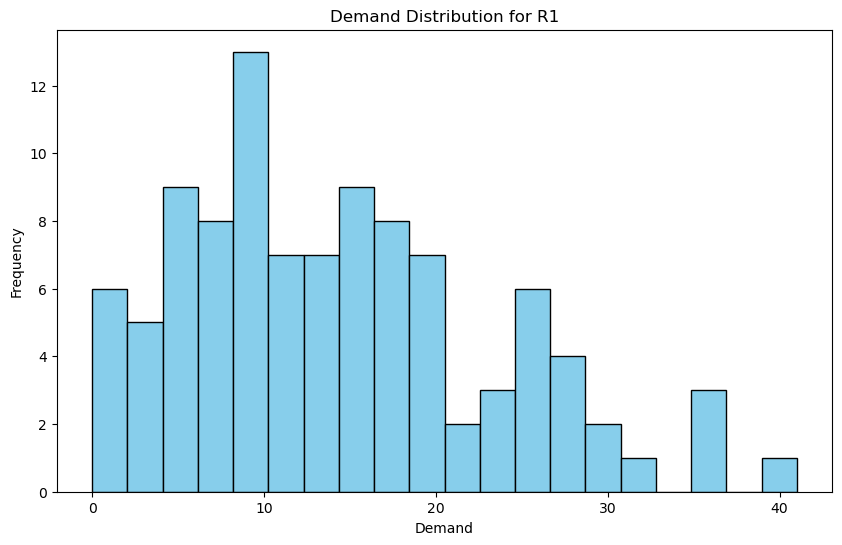

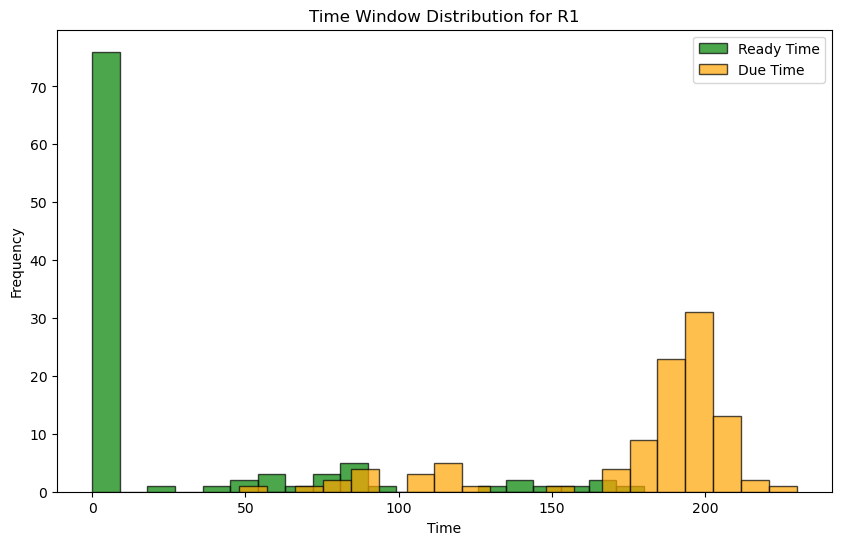

C:\Users\ruxan\AppData\Local\Temp\ipykernel_26800\3769574731.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['ready_time'], df['due_time']], labels=["Ready Time", "Due Time"], patch_artist=True,


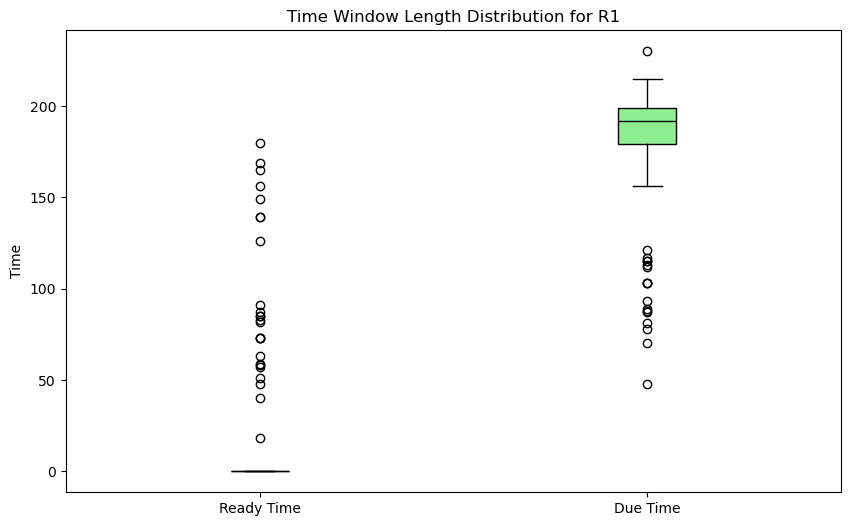

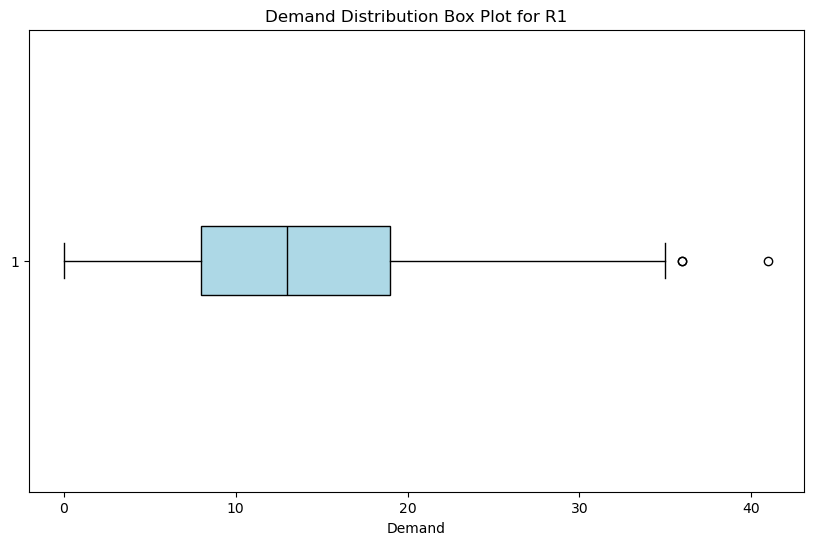

Processing R2 from solomon-100/r208.txt...
Number of customers: 101
Total demand: 1458
Average demand: 14.44
Minimum demand: 0
Maximum demand: 41
Earliest ready time: 0
Latest due time: 1000
Total vehicle capacity: 25000
Demand-to-capacity ratio: 0.06


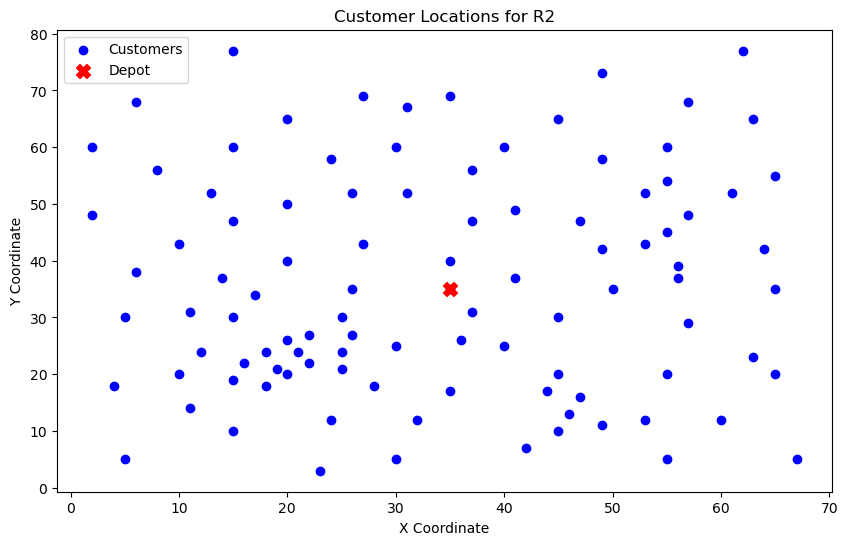

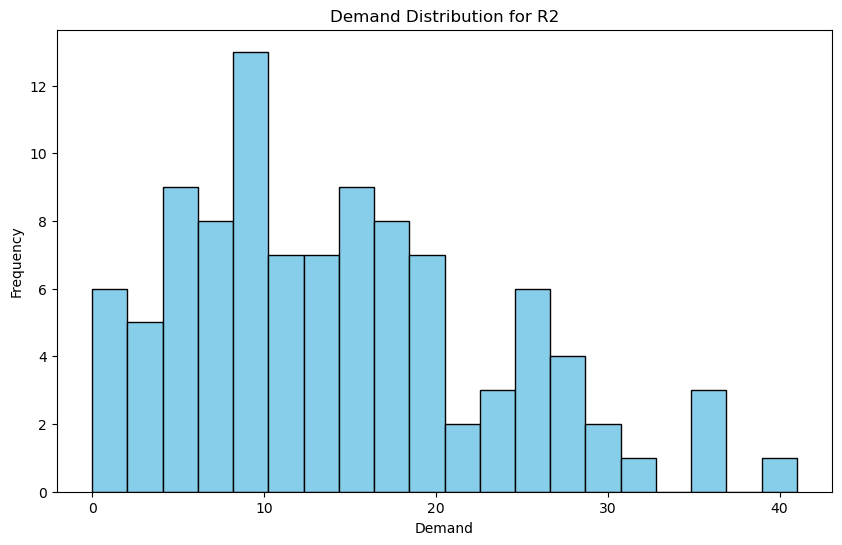

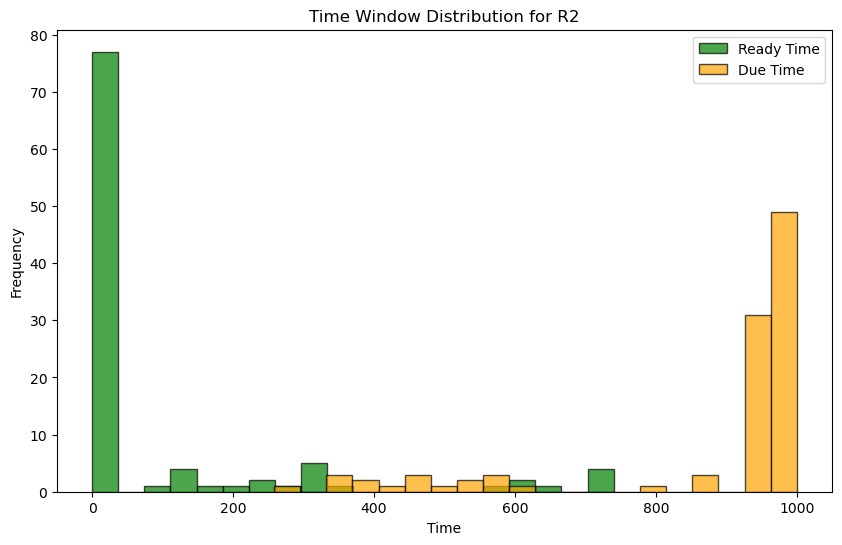

C:\Users\ruxan\AppData\Local\Temp\ipykernel_26800\3769574731.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['ready_time'], df['due_time']], labels=["Ready Time", "Due Time"], patch_artist=True,


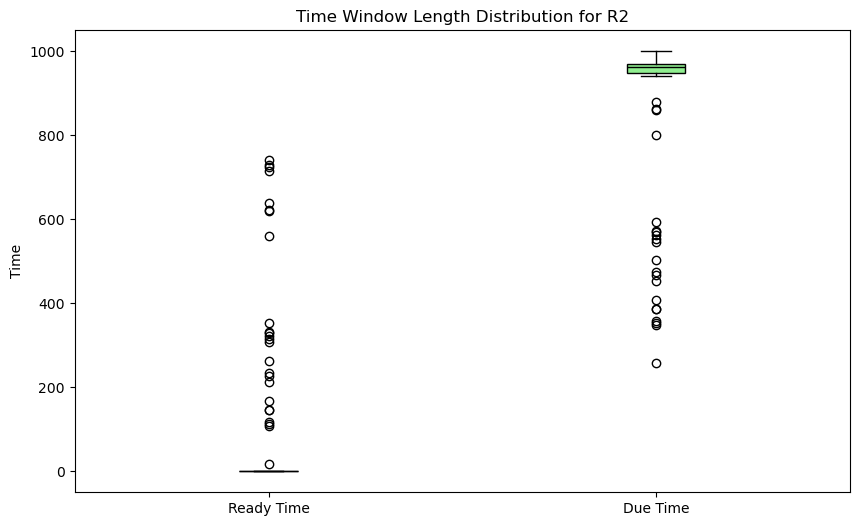

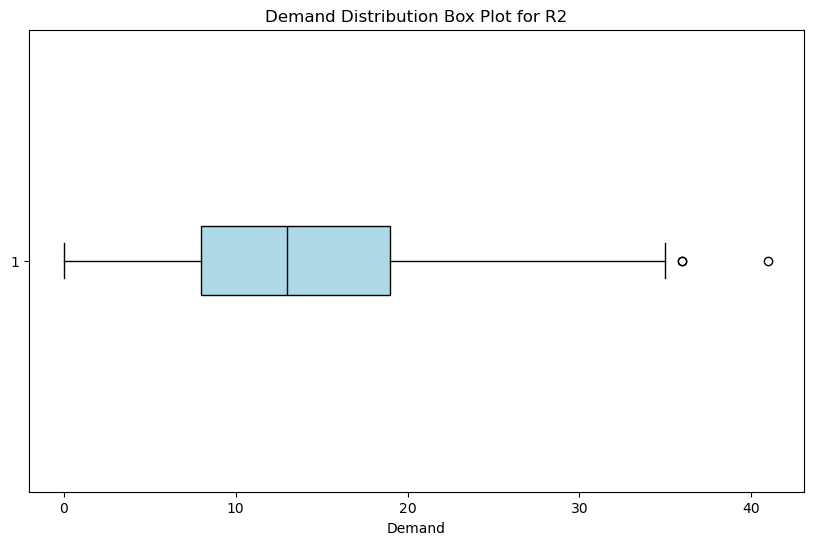

Processing RC1 from solomon-100/rc108.txt...
Number of customers: 101
Total demand: 1724
Average demand: 17.07
Minimum demand: 0
Maximum demand: 40
Earliest ready time: 0
Latest due time: 240
Total vehicle capacity: 5000
Demand-to-capacity ratio: 0.34


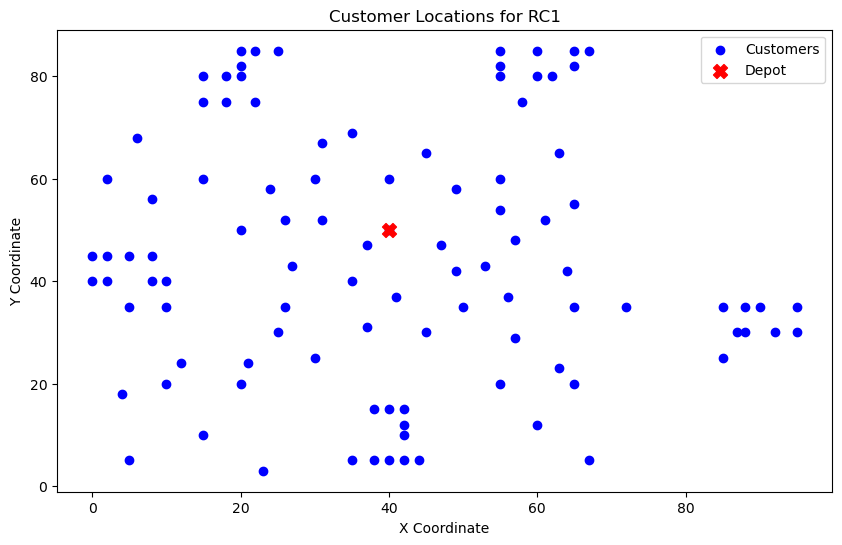

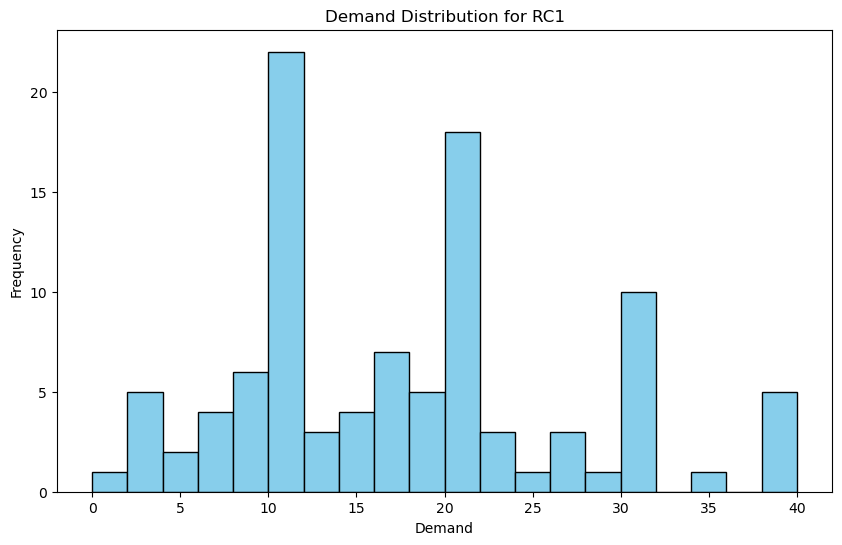

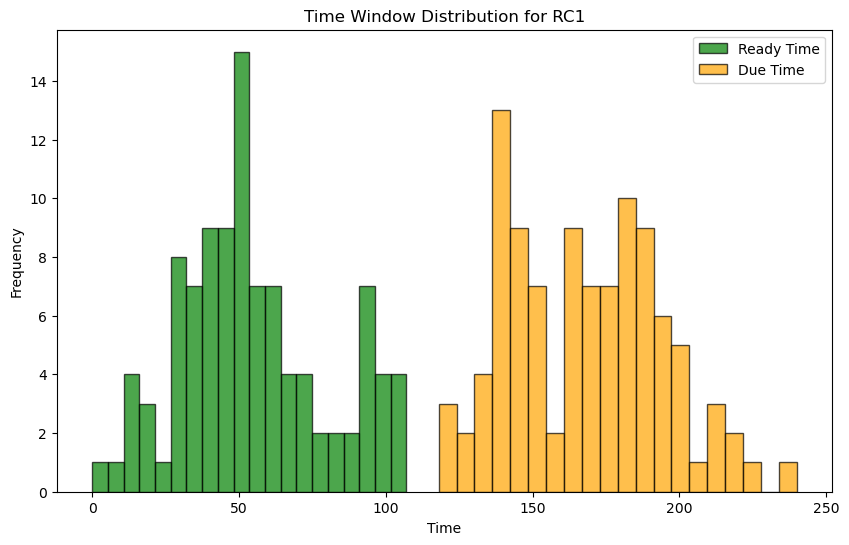

C:\Users\ruxan\AppData\Local\Temp\ipykernel_26800\3769574731.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['ready_time'], df['due_time']], labels=["Ready Time", "Due Time"], patch_artist=True,


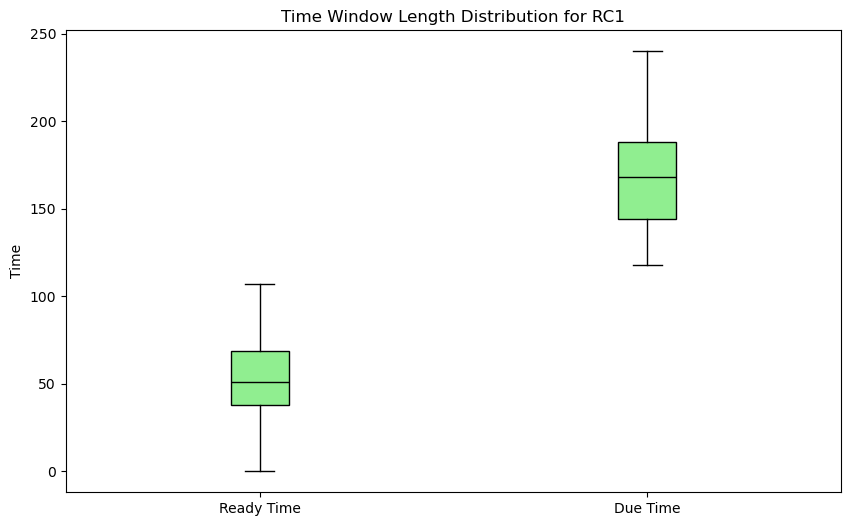

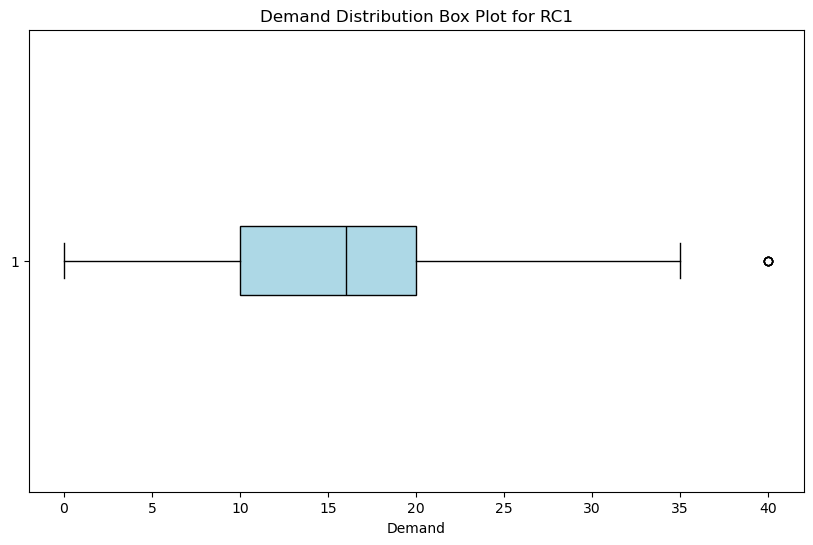

Processing RC2 from solomon-100/rc208.txt...
Number of customers: 101
Total demand: 1724
Average demand: 17.07
Minimum demand: 0
Maximum demand: 40
Earliest ready time: 0
Latest due time: 960
Total vehicle capacity: 25000
Demand-to-capacity ratio: 0.07


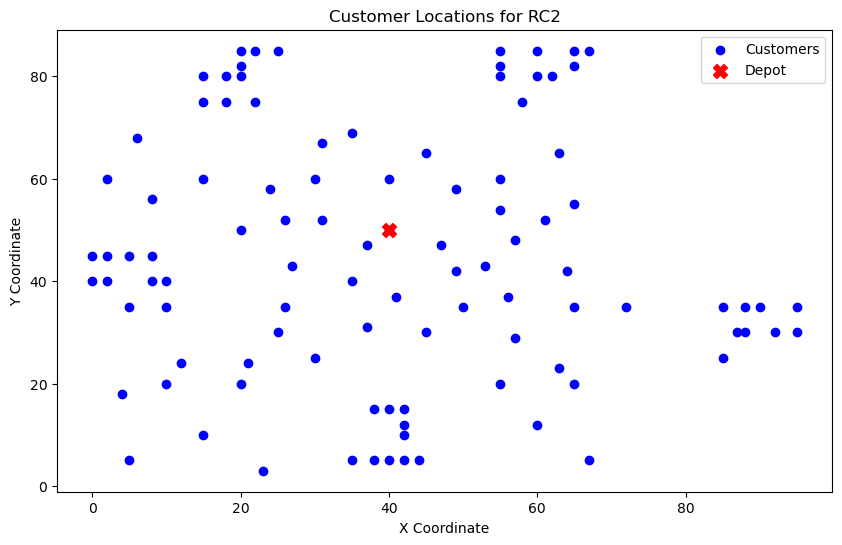

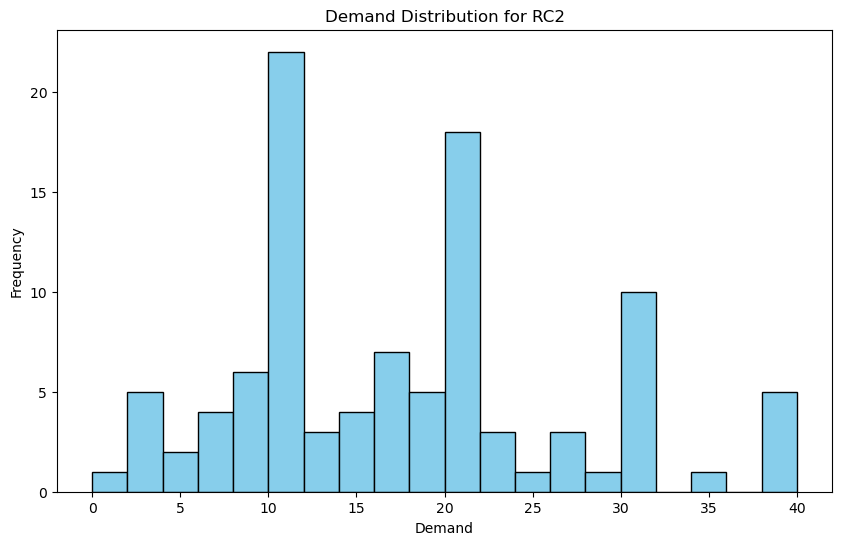

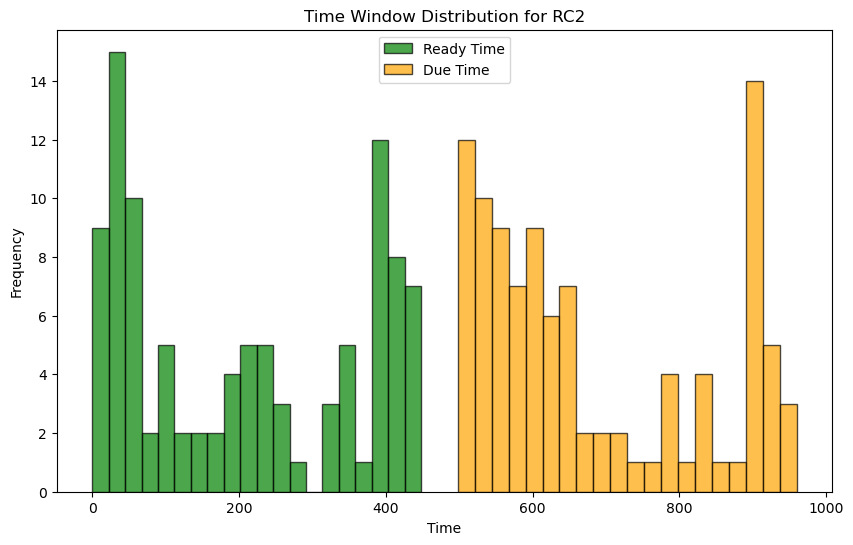

C:\Users\ruxan\AppData\Local\Temp\ipykernel_26800\3769574731.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['ready_time'], df['due_time']], labels=["Ready Time", "Due Time"], patch_artist=True,


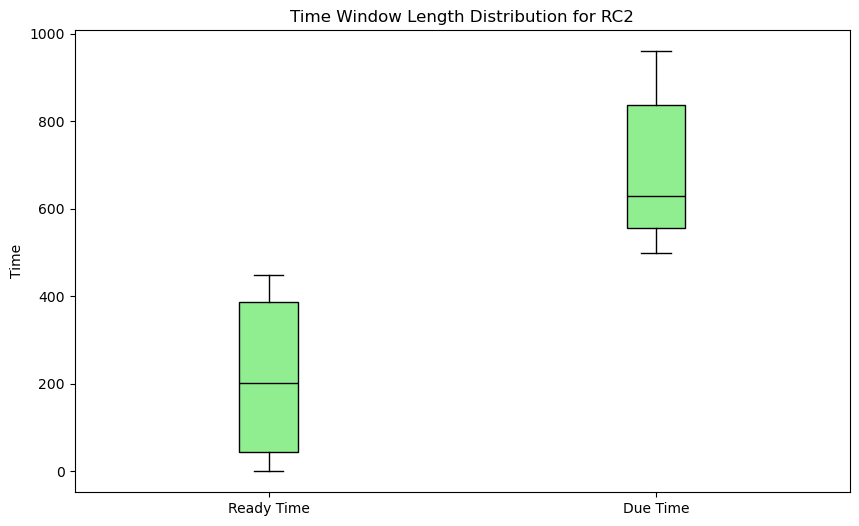

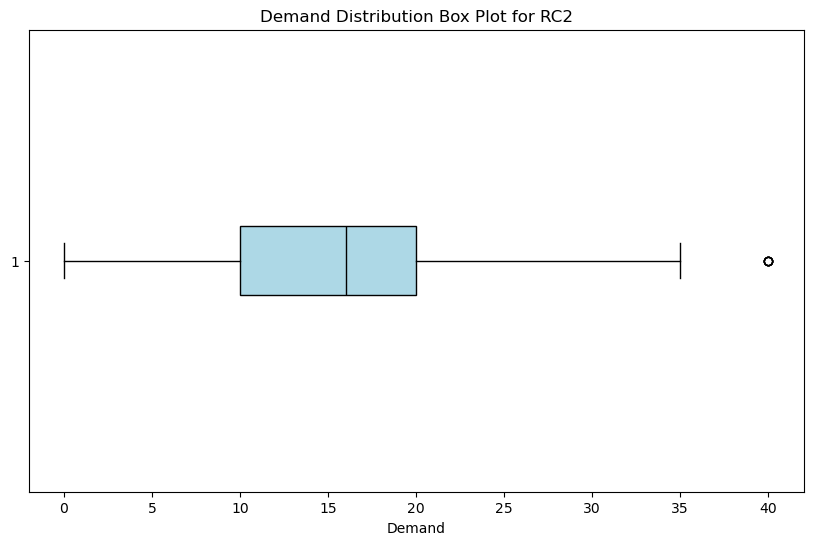

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Helper function to parse a single Solomon dataset file
def parse_solomon_file(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()

    vehicle_info = {}
    customers = []
    lines = [line.strip() for line in lines if line.strip()]

    for i, line in enumerate(lines):
        if line.startswith("VEHICLE NUMBER"):
            vehicle_info["number"] = int(line.split()[-1])
        elif line.startswith("CAPACITY"):
            vehicle_info["capacity"] = int(line.split()[-1])
        elif line.startswith("CUST NO."):
            for customer_line in lines[i + 1:]:
                data = customer_line.split()
                if len(data) >= 7:
                    customers.append({
                        "id": int(data[0]),
                        "x": float(data[1]),
                        "y": float(data[2]),
                        "demand": int(data[3]),
                        "ready_time": int(data[4]),
                        "due_time": int(data[5]),
                        "service_time": int(data[6]),
                    })
            break

    return vehicle_info, customers

# Function to plot customer locations for each category
def plot_customer_locations(df, category_name, depot):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['x'], df['y'], c='blue', label='Customers')
    plt.scatter([depot['x']], [depot['y']], c='red', label='Depot', marker='X', s=100)
    plt.title(f"Customer Locations for {category_name}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.show()

# Function to plot demand distribution for each category
def plot_demand_distribution(df, category_name):
    plt.figure(figsize=(10, 6))
    plt.hist(df['demand'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Demand Distribution for {category_name}")
    plt.xlabel("Demand")
    plt.ylabel("Frequency")
    plt.show()

# Function to plot time window distribution for each category
def plot_time_window_distribution(df, category_name):
    plt.figure(figsize=(10, 6))
    plt.hist(df['ready_time'], bins=20, alpha=0.7, label='Ready Time', color='green', edgecolor='black')
    plt.hist(df['due_time'], bins=20, alpha=0.7, label='Due Time', color='orange', edgecolor='black')
    plt.title(f"Time Window Distribution for {category_name}")
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Function to plot box plots for time window length and demand distributions
def plot_box_plots(df, category_name):
    plt.figure(figsize=(10, 6))
    plt.boxplot([df['ready_time'], df['due_time']], labels=["Ready Time", "Due Time"], patch_artist=True, 
                boxprops=dict(facecolor="lightgreen", color="black"), medianprops=dict(color="black"))
    plt.title(f"Time Window Length Distribution for {category_name}")
    plt.ylabel("Time")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.boxplot(df['demand'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue", color="black"),
                medianprops=dict(color="black"))
    plt.title(f"Demand Distribution Box Plot for {category_name}")
    plt.xlabel("Demand")
    plt.show()

# Main execution for all categories
categories = ['C1', 'C2', 'R1', 'R2', 'RC1', 'RC2']
category_paths = {
    'C1': ["solomon-100/c108.txt"],  
    'C2': ["solomon-100/c208.txt"], 
    'R1': ["solomon-100/r108.txt"],
    'R2': ["solomon-100/r208.txt"],
    'RC1': ["solomon-100/rc108.txt"],
    'RC2': ["solomon-100/rc208.txt"]
}

# Loop through each category and process the corresponding files
for category in categories:
    for file_path in category_paths[category]:
        print(f"Processing {category} from {file_path}...")
        vehicle_info, customers = parse_solomon_file(file_path)

        # Convert customers data to a DataFrame for analysis
        df = pd.DataFrame(customers)

        # Basic Statistics
        print(f"Number of customers: {len(df)}")
        print(f"Total demand: {df['demand'].sum()}")
        print(f"Average demand: {df['demand'].mean():.2f}")
        print(f"Minimum demand: {df['demand'].min()}")
        print(f"Maximum demand: {df['demand'].max()}")
        
        # Time window statistics
        print(f"Earliest ready time: {df['ready_time'].min()}")
        print(f"Latest due time: {df['due_time'].max()}")
        
        # Capacity feasibility
        total_capacity = vehicle_info["number"] * vehicle_info["capacity"]
        print(f"Total vehicle capacity: {total_capacity}")
        print(f"Demand-to-capacity ratio: {df['demand'].sum() / total_capacity:.2f}")

        
        # Find depot location (assuming depot is the first customer in the file)
        depot = {'x': customers[0]['x'], 'y': customers[0]['y']}

        # Generate plots for each category
        plot_customer_locations(df, category, depot)
        plot_demand_distribution(df, category)
        plot_time_window_distribution(df, category)
        plot_box_plots(df, category)


__RESULTS OVERALL ANALYSIS__

Preview of the dataset:
       File  Vehicles Used  Total Distance  \
0  c101.txt             15     1901.813725   
1  c102.txt             11     2294.993436   
2  c103.txt             11     2800.358796   
3  c104.txt             11     2767.391375   
4  c105.txt             14     2431.133957   

                                              Routes  
0  Route 1 : 0 1 75 0\nRoute 2 : 0 2 69 49 0\nRou...  
1  Route 1 : 0 1 33 62 44 38 39 36 66 2 12 0\nRou...  
2  Route 1 : 0 1 33 8 10 30 6 4 22 63 49 0\nRoute...  
3  Route 1 : 0 1 87 76 15 9 2 4 3 5 63 0\nRoute 2...  
4  Route 1 : 0 1 47 0\nRoute 2 : 0 2 22 49 0\nRou...  

General Statistics:
Total files processed: 56
Successful solutions: 56
Failed solutions: 0

Performance Metrics:
Average vehicles used: 11.86
Minimum vehicles used: 4
Maximum vehicles used: 24
Average total distance: 2585.13
Minimum total distance: 1012.9446347968772
Maximum total distance: 3420.7598434394013


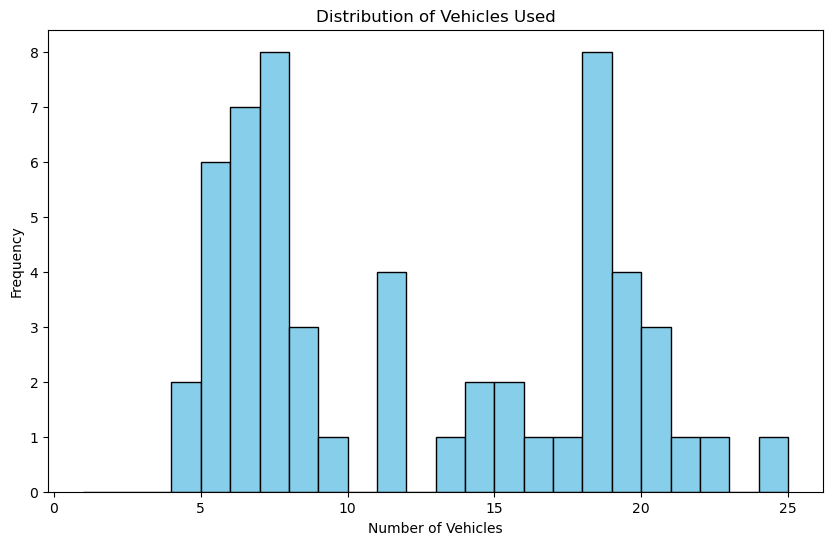

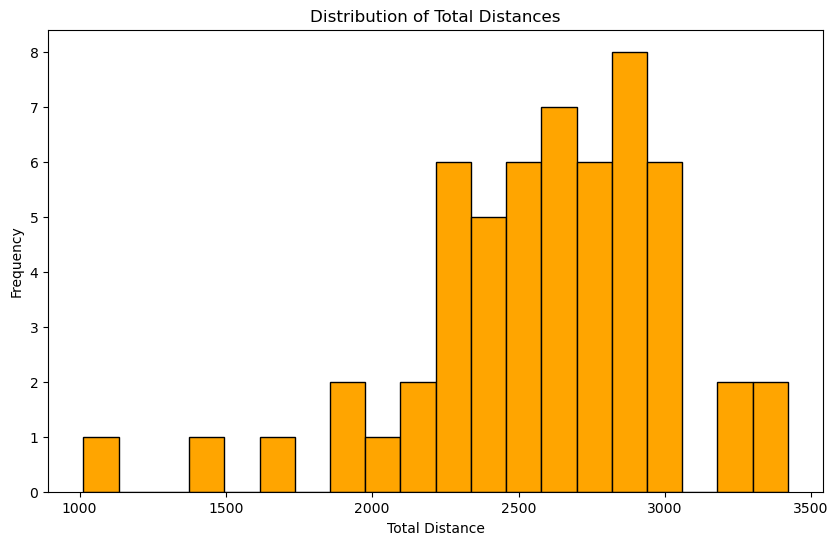

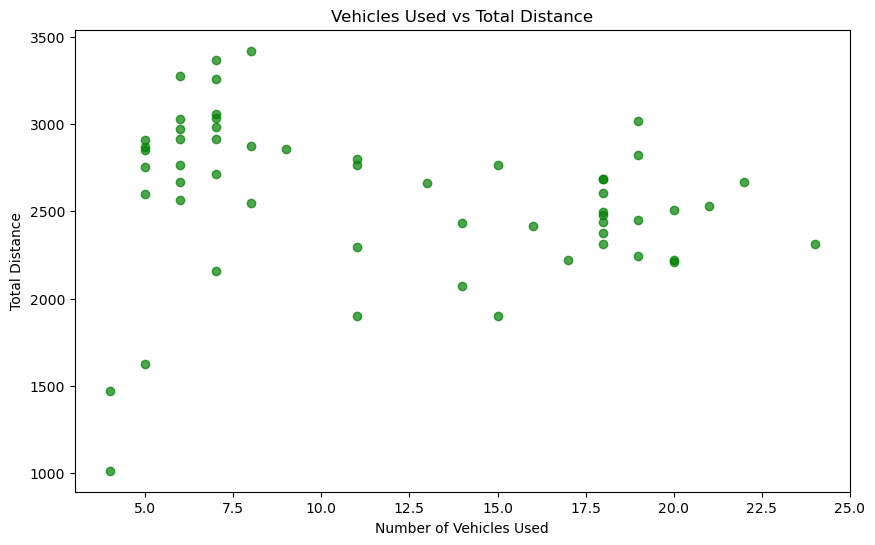


Files with Failed Solutions or Errors:
No failed solutions!

Summary saved to summary_results.csv.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results dataset
results_path = "results.csv"  
results = pd.read_csv(results_path)

# Display the first few rows of the dataset
print("Preview of the dataset:")
print(results.head())

# General Statistics
total_files = len(results)
successful_solutions = results[results["Vehicles Used"] != "No Solution"]
failed_solutions = results[results["Vehicles Used"] == "No Solution"]

print("\nGeneral Statistics:")
print(f"Total files processed: {total_files}")
print(f"Successful solutions: {len(successful_solutions)}")
print(f"Failed solutions: {len(failed_solutions)}")

# Convert numerical columns to proper types for analysis
successful_solutions["Vehicles Used"] = pd.to_numeric(successful_solutions["Vehicles Used"])
successful_solutions["Total Distance"] = pd.to_numeric(successful_solutions["Total Distance"])

# Performance Metrics
print("\nPerformance Metrics:")
print(f"Average vehicles used: {successful_solutions['Vehicles Used'].mean():.2f}")
print(f"Minimum vehicles used: {successful_solutions['Vehicles Used'].min()}")
print(f"Maximum vehicles used: {successful_solutions['Vehicles Used'].max()}")
print(f"Average total distance: {successful_solutions['Total Distance'].mean():.2f}")
print(f"Minimum total distance: {successful_solutions['Total Distance'].min()}")
print(f"Maximum total distance: {successful_solutions['Total Distance'].max()}")

# Plotting

# 1. Histogram of Vehicles Used
plt.figure(figsize=(10, 6))
plt.hist(successful_solutions["Vehicles Used"], bins=range(1, successful_solutions["Vehicles Used"].max() + 2),
         color="skyblue", edgecolor="black")
plt.title("Distribution of Vehicles Used")
plt.xlabel("Number of Vehicles")
plt.ylabel("Frequency")
plt.show()

# 2. Histogram of Total Distances
plt.figure(figsize=(10, 6))
plt.hist(successful_solutions["Total Distance"], bins=20, color="orange", edgecolor="black")
plt.title("Distribution of Total Distances")
plt.xlabel("Total Distance")
plt.ylabel("Frequency")
plt.show()

# 3. Scatter Plot of Vehicles Used vs Total Distance
plt.figure(figsize=(10, 6))
plt.scatter(successful_solutions["Vehicles Used"], successful_solutions["Total Distance"], color="green", alpha=0.7)
plt.title("Vehicles Used vs Total Distance")
plt.xlabel("Number of Vehicles Used")
plt.ylabel("Total Distance")
plt.show()

# Failed Solutions
print("\nFiles with Failed Solutions or Errors:")
if len(failed_solutions) > 0:
    print(failed_solutions[["File", "Routes"]])
else:
    print("No failed solutions!")

# Save a summary to a new CSV file
summary = {
    "Total Files Processed": total_files,
    "Successful Solutions": len(successful_solutions),
    "Failed Solutions": len(failed_solutions),
    "Average Vehicles Used": successful_solutions["Vehicles Used"].mean(),
    "Average Total Distance": successful_solutions["Total Distance"].mean(),
}
summary_df = pd.DataFrame([summary])
summary_df.to_csv("summary_results.csv", index=False)
print("\nSummary saved to summary_results.csv.")


__RESULTS ANALYSIS BY CATEGORIES__

Summary Statistics by Category:
  Category  Total_Files  Successful_Files  Avg_Vehicles_Used  \
0       c1           17                17          15.411765   
1       c2           16                16           6.187500   
2       r1           12                12          19.416667   
3       r2           11                11           6.363636   

   Min_Vehicles_Used  Max_Vehicles_Used  Avg_Total_Distance  \
0                 11                 21         2506.618526   
1                  4                  8         2638.420948   
2                 17                 24         2390.534499   
3                  5                  9         2841.222295   

   Min_Total_Distance  Max_Total_Distance  
0         1901.080897         3016.830633  
1         1012.944635         3420.759843  
2         2210.426803         2665.806620  
3         2563.415261         3055.811661  

Category summary saved to category_summary.csv.


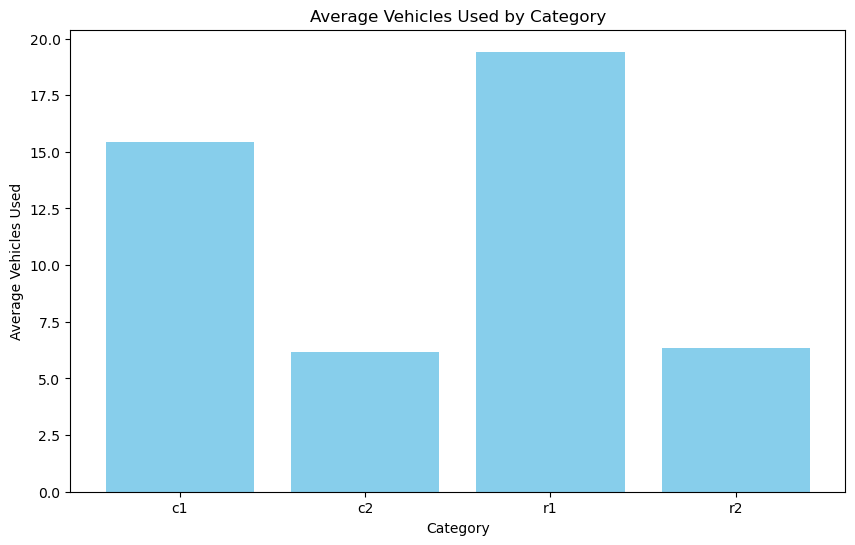

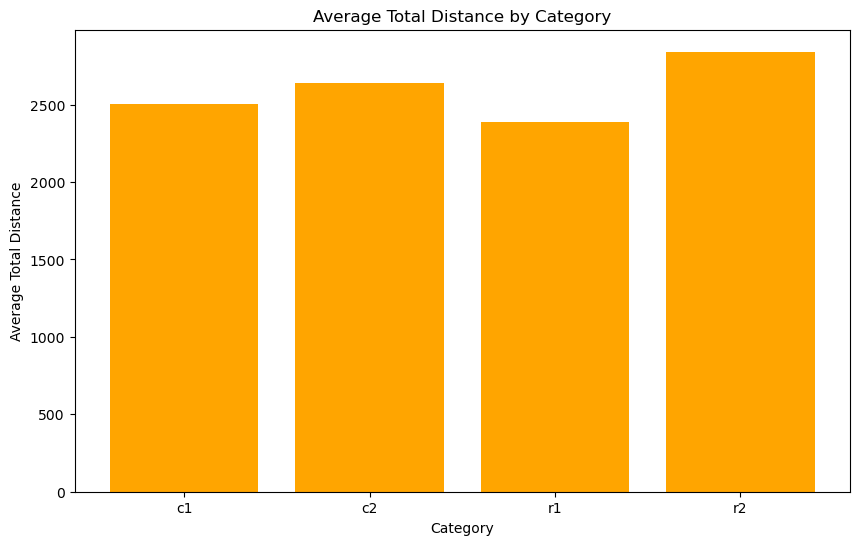

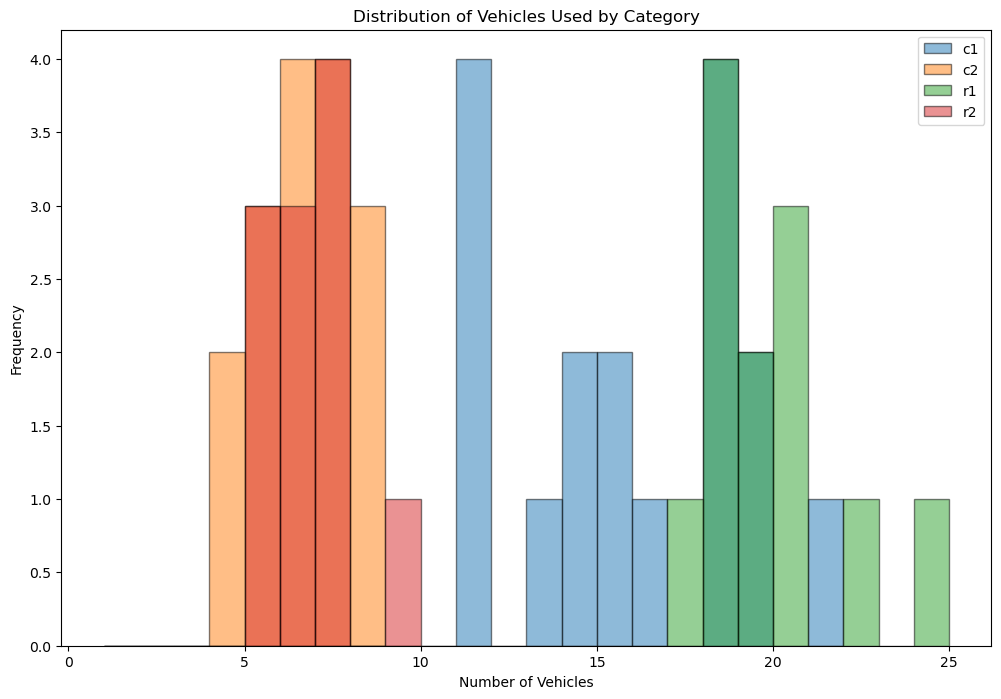

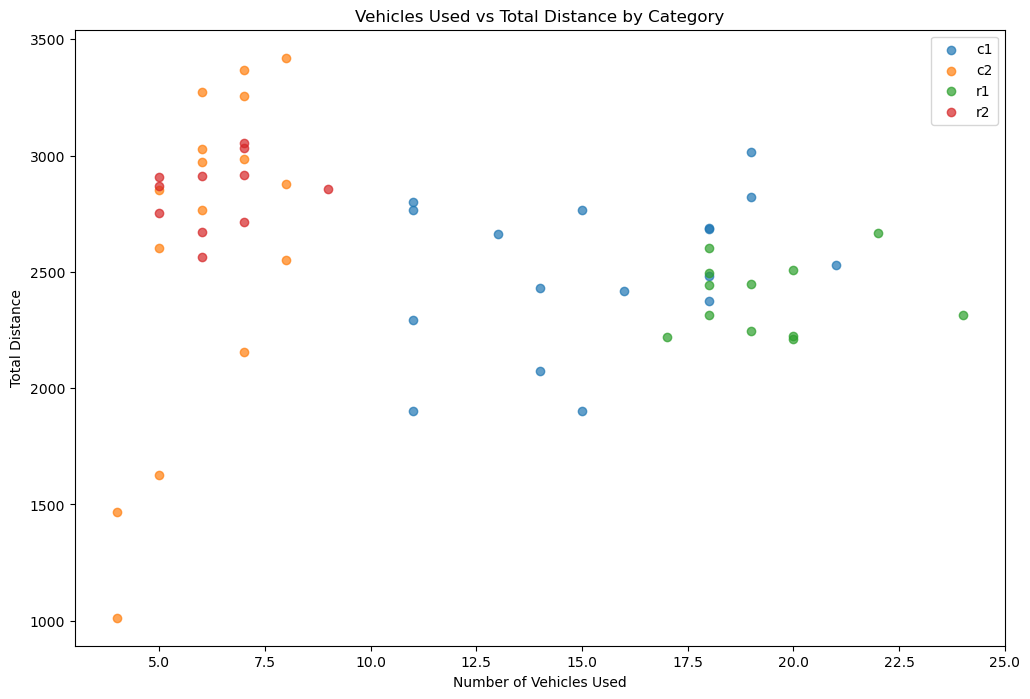


Failed Solutions by Category:
Empty DataFrame
Columns: [Category, Failed Files]
Index: []


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results dataset
results_path = "results.csv"  
results = pd.read_csv(results_path)

# Add a "Category" column based on file names
def get_category(file_name):
    for category in ["r1", "r2", "c1", "c2", "rc1", "rc2"]:
        if category in file_name:
            return category
    return "Unknown"

results["Category"] = results["File"].apply(get_category)

# Separate successful and failed solutions
successful_solutions = results[results["Vehicles Used"] != "No Solution"].copy()
failed_solutions = results[results["Vehicles Used"] == "No Solution"].copy()

# Convert numerical columns to proper types for analysis
successful_solutions["Vehicles Used"] = pd.to_numeric(successful_solutions["Vehicles Used"])
successful_solutions["Total Distance"] = pd.to_numeric(successful_solutions["Total Distance"])

# Summary statistics for each category
category_summary = successful_solutions.groupby("Category").agg(
    Total_Files=("File", "count"),
    Successful_Files=("Vehicles Used", "count"),
    Avg_Vehicles_Used=("Vehicles Used", "mean"),
    Min_Vehicles_Used=("Vehicles Used", "min"),
    Max_Vehicles_Used=("Vehicles Used", "max"),
    Avg_Total_Distance=("Total Distance", "mean"),
    Min_Total_Distance=("Total Distance", "min"),
    Max_Total_Distance=("Total Distance", "max")
).reset_index()

print("Summary Statistics by Category:")
print(category_summary)

# Save the summary to a CSV file
category_summary.to_csv("category_summary.csv", index=False)
print("\nCategory summary saved to category_summary.csv.")

# Visualization

# 1. Bar Plot: Average Vehicles Used by Category
plt.figure(figsize=(10, 6))
plt.bar(category_summary["Category"], category_summary["Avg_Vehicles_Used"], color="skyblue")
plt.title("Average Vehicles Used by Category")
plt.xlabel("Category")
plt.ylabel("Average Vehicles Used")
plt.show()

# 2. Bar Plot: Average Total Distance by Category
plt.figure(figsize=(10, 6))
plt.bar(category_summary["Category"], category_summary["Avg_Total_Distance"], color="orange")
plt.title("Average Total Distance by Category")
plt.xlabel("Category")
plt.ylabel("Average Total Distance")
plt.show()

# 3. Histogram: Vehicles Used for Each Category
plt.figure(figsize=(12, 8))
for category in category_summary["Category"]:
    subset = successful_solutions[successful_solutions["Category"] == category]
    plt.hist(subset["Vehicles Used"], bins=range(1, subset["Vehicles Used"].max() + 2),
             alpha=0.5, label=category, edgecolor="black")
plt.title("Distribution of Vehicles Used by Category")
plt.xlabel("Number of Vehicles")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 4. Scatter Plot: Vehicles Used vs Total Distance by Category
plt.figure(figsize=(12, 8))
for category in category_summary["Category"]:
    subset = successful_solutions[successful_solutions["Category"] == category]
    plt.scatter(subset["Vehicles Used"], subset["Total Distance"], label=category, alpha=0.7)
plt.title("Vehicles Used vs Total Distance by Category")
plt.xlabel("Number of Vehicles Used")
plt.ylabel("Total Distance")
plt.legend()
plt.show()

# Failed Solutions by Category
print("\nFailed Solutions by Category:")
failed_by_category = failed_solutions.groupby("Category").size().reset_index(name="Failed Files")
print(failed_by_category)


__VISUALISATION OF THE ROUTES FOR A SINGLE PROBLEM FILE__

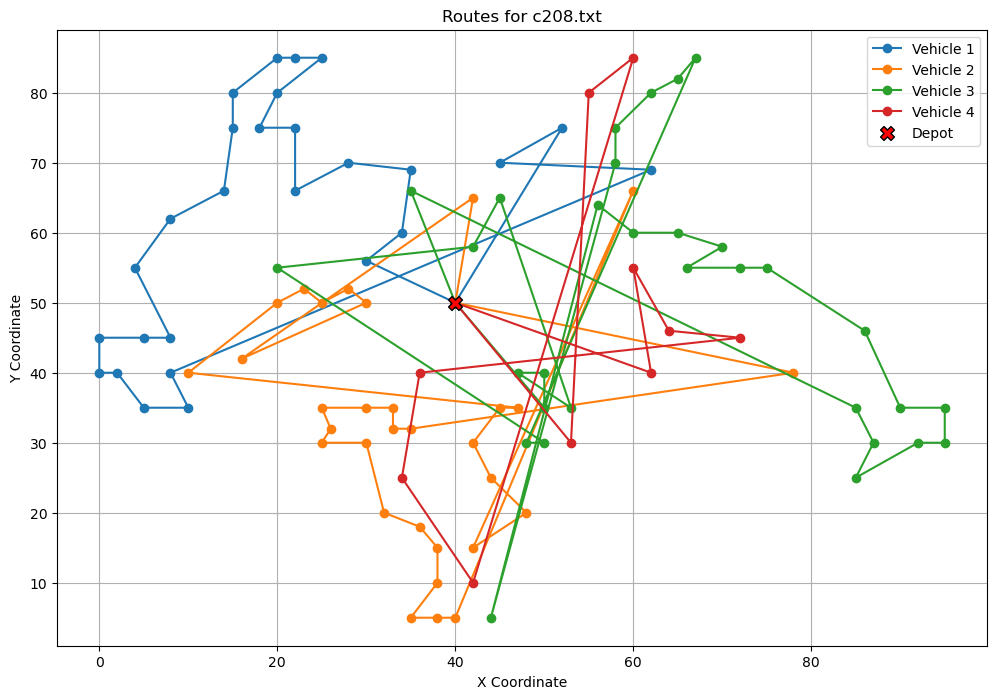

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Helper function to parse Solomon dataset files
def parse_solomon_file(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()

    customers = []
    lines = [line.strip() for line in lines if line.strip()]
    for i, line in enumerate(lines):
        if line.startswith("CUST NO."):
            for customer_line in lines[i + 1:]:
                data = customer_line.split()
                if len(data) >= 7:
                    customers.append({
                        "id": int(data[0]),
                        "x": float(data[1]),
                        "y": float(data[2]),
                        "demand": int(data[3]),
                        "ready_time": int(data[4]),
                        "due_time": int(data[5]),
                        "service_time": int(data[6]),
                    })
            break

    return customers

# Function to parse and clean routes from results.csv
def parse_routes_from_results(results_file, problem_file):
    # Load the results file
    results = pd.read_csv(results_file)
    
    # Identify the row corresponding to the problem file
    solution_row = results[results["File"] == problem_file]
    if solution_row.empty:
        print(f"No solution found for {problem_file} in results.csv.")
        return None

    # Extract and parse routes
    raw_routes = solution_row.iloc[0]["Routes"]
    if raw_routes == "No Solution":
        print(f"No solution available for {problem_file}.")
        return None
    
    # Convert routes into a dictionary
    routes = {}
    for i, line in enumerate(raw_routes.split("\n")):
        if line.startswith("Route"):
            route = list(map(int, line.split(":")[1].strip().split()))
            routes[i] = route[1:-1]  # Exclude depot (0) at start and end
    return routes

# Visualization function
def visualize_routes(file_path, routes, customers):
    depot = customers[0]  # The depot is the first customer
    plt.figure(figsize=(12, 8))
    
    # Plot all routes
    for vehicle, route in routes.items():
        if route:
            # Extract coordinates for the route
            route_coords = [(depot["x"], depot["y"])] + [(customers[cust]["x"], customers[cust]["y"]) for cust in route] + [(depot["x"], depot["y"])]
            x_coords, y_coords = zip(*route_coords)
            
            # Plot the route
            plt.plot(x_coords, y_coords, marker="o", label=f"Vehicle {vehicle + 1}")
    
    # Plot depot
    plt.scatter(depot["x"], depot["y"], color="red", label="Depot", zorder=5, s=100, edgecolor="black", marker="X")
    
    # Add labels and legend
    plt.title(f"Routes for {file_path}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
problem_file = "c208.txt"  # Problem file name
problem_folder = "solomon-100"  # Folder containing the problem file
results_file = "results.csv"  # The results file

# Parse problem data
problem_file_path = f"{problem_folder}/{problem_file}"
customers = parse_solomon_file(problem_file_path)

# Parse routes from results
routes = parse_routes_from_results(results_file, problem_file)
if routes:
    # Visualize the routes
    visualize_routes(problem_file, routes, customers)
